# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [1]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='./Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [4]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 4.1 Policy based method

#### 4.1.1 Define the policy

In [5]:
from collections import deque

In [6]:
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
import time
%matplotlib inline

from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

In [7]:
%%time
def ddpg(agent,n_episodes=1000, max_t=1000, last_episode_number=1):

    scores_window = deque(maxlen=100)
    scores = []
    total_time_elapsed = 0
    for i_episode in range(last_episode_number, n_episodes+1):
        begin = time.time()
        avg_score = 0
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment
#         print('Reset environment...')
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores_t = np.zeros(num_agents)                        # initialize the score (for each agent)
        agent.reset()
        score = 0
        for t_step in range(max_t):
#             print(t_step)
            actions = agent.act(states)     
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished   
            agent.step(states, actions, rewards, next_states, dones, t_step)
            states = next_states
            scores_t += rewards
            if np.any(dones):
                break
        
        score = np.mean(scores_t)
        scores_window.append(score)
        avg_score = np.mean(scores_window)
        scores.append(score)        
        
        end = time.time()
        diff = end - begin
        print("\rEpisode {:}\t Average Score {:.2f}\tMax Score {:.2f}\tTime {:.2f} s".format(i_episode, avg_score, scores_t.max(), diff), end="")
        total_time_elapsed += diff
        
        if i_episode % 20 == 0:
            print("\rEpisode {:}\t Average Score {:.2f}\tMax Score {:.2f}".format(i_episode, avg_score, scores_t.max()))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_'+str(i_episode)+'.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_'+str(i_episode)+'.pth')

        if avg_score >= 30:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\t\tTime Elapsed {:.2f} s'.format(i_episode, avg_score,total_time_elapsed))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')            
            break
    return scores

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.48 µs


In [14]:
%%time
print ("==================================")
scores = ddpg(agent,n_episodes=1000, max_t=1000, last_episode_number=1)
print ("\n==================================")

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	 Average Score 0.58	Max Score 2.49	Time 21.17 s
Episode 40	 Average Score 1.46	Max Score 7.99	Time 25.27 s
Episode 60	 Average Score 2.34	Max Score 5.25	Time 28.07 s
Episode 80	 Average Score 3.13	Max Score 9.76	Time 27.80 ss
Episode 100	 Average Score 3.81	Max Score 11.36	Time 26.80 s
Episode 120	 Average Score 5.57	Max Score 32.42	Time 27.66 s
Episode 140	 Average Score 7.44	Max Score 16.78	Time 27.72 s
Episode 160	 Average Score 9.21	Max Score 19.54	Time 26.93 s
Episode 180	 Average Score 11.13	Max Score 27.55	Time 27.25 s
Episode 200	 Average Score 12.53	Max Score 19.80	Time 28.44 s
Episode 220	 Average Score 13.69	Max Score 35.06	Time 27.11 s
Episode 240	 Average Score 15.35	Max Score 27.35	Time 28.34 s
Episode 260	 Average Score 16.65	Max Score 29.85	Time 28.32 s
Episode 280	 Average Score 18.11	Max Score 33.33	Time 28.51 s
Episode 300	 Average Score 20.34	Max Score 39.33	Time 26.82 s
Episode 320	 Average Score 22.53	Max Score 34.84	Time 28.43 s
Episode 340	 Average Sc

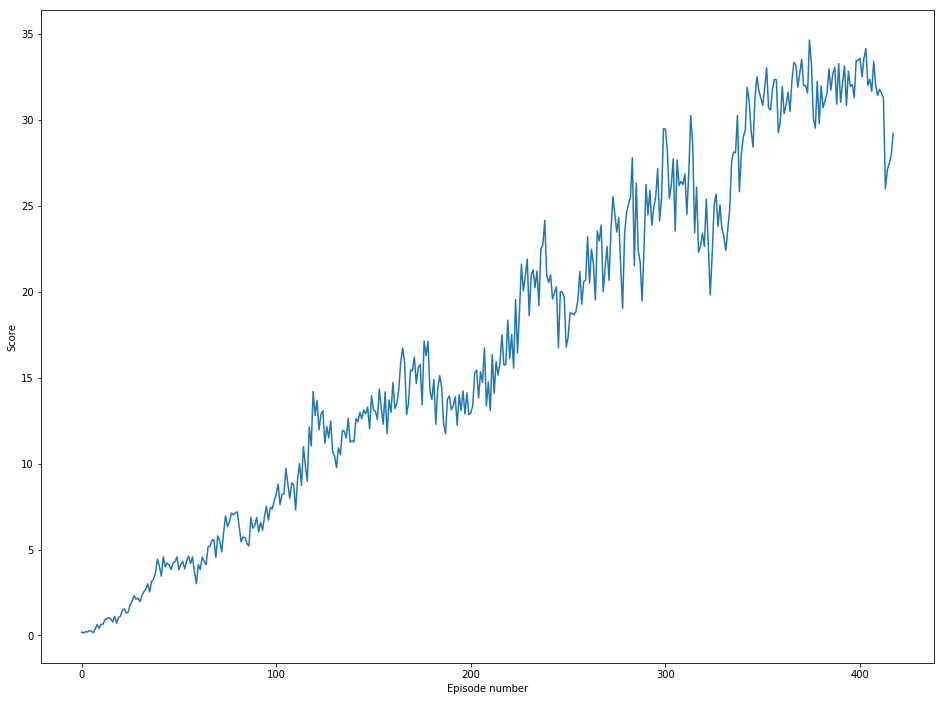

CPU times: user 688 ms, sys: 0 ns, total: 688 ms
Wall time: 687 ms


In [15]:
%%time
# plot the scores
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.xlabel('Episode number')
plt.ylabel('Score')
plt.show()